In [17]:
!pip install pycaret

In [154]:
!pip install optuna

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=eaef9613505945c8f8d067701a830efa98c3f85e6ba80a5fc1a30e0a857c5b2b
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [155]:

!pip install catboost
from pycaret.regression import setup, compare_models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import scipy.stats

from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor
import optuna

sns.set_style("darkgrid")
pd.set_option("max_columns",None)
pd.set_option("max_rows", 90)
train0=pd.read_csv(r"C:\Users\usuario\Downloads\house-prices-advanced-regression-techniques\train.csv")
test0=pd.read_csv(r"C:\Users\usuario\Downloads\house-prices-advanced-regression-techniques\test.csv")
sample_submission=pd.read_csv(r"C:\Users\usuario\Downloads\house-prices-advanced-regression-techniques\sample_submission.csv")
train0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [75]:
from sklearn.model_selection import KFold, cross_val_score

In [76]:
test0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [77]:
sample_submission

,Id,SalePrice
0,1461.0,205337.074216
1,1462.0,178355.653482
2,1463.0,219591.303457
3,1464.0,146147.662857
4,1465.0,281246.763632
...,...,...
1456,2917.0,206102.956675
1457,2918.0,265993.509050
1458,2919.0,140359.541760
1459,NaN,148319.621908


## Cleaning

In [78]:
train0.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**combine train and test sets**


In [79]:
#here we create two columns in base of other columns 
target=train0["SalePrice"]
test_ids=test0["Id"]
#here we drop the columns previuosly changed 
train1=train0.drop(["Id","SalePrice"], axis=1)
test1=test0.drop("Id",axis=1)
#here we create 1 data set with all the info we change previously
data1=pd.concat([train1,test1],axis=0).reset_index(drop=True)
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

In [80]:
##ensure proper data types
data2=data1.copy()
data2["MSSubClass"]=data2["MSSubClass"].astype(str)


In [81]:
## fill categorical missing values
#impute using a constant value(we use this one if the missing value actually mean something in the data description
for column in['Alley',
              'BsmtQual',
              'BsmtCond',
              'BsmtExposure',
              'BsmtFinType1',
              'BsmtFinType2',
              'FireplaceQu',
              'GarageType',
              'GarageFinish',
              'GarageQual',
              'GarageCond',
              'PoolQC',
              'Fence',
              'MiscFeature'
              
              
              
              
    
]:
    data2[column]=data2[column].fillna("None")
# impute using the column mode (we use this if it doesnt mean anything "acording to the data description")
for column in['Utilities',
              'Exterior1st',
              'Exterior2nd',
              'MasVnrType',
              'Electrical',
              'KitchenQual',
              'Functional',
              'SaleType',
              'MSZoning'
              
              
              
    
]:
    data2[column]=data2[column].fillna(data2[column].mode()[0])

In [82]:
data2.select_dtypes("object").loc[:, data2.isna().sum()>0].columns#this help us to search the object columns and at the same
#time tell me what of these 

Index([], dtype='object')

In [83]:
data2.select_dtypes("object").isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [84]:
data3=data2.copy()

In [85]:
##fill the numeric missing values
data3.select_dtypes(np.number).isna().sum()

LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [86]:
#this function erase the missing values of numerical columns
def knn_impute(df,na_target):
    df=df.copy()
    
    numeric_df=df.select_dtypes(np.number)
    non_na_columns= numeric_df.loc[:,numeric_df.isna().sum() ==0].columns
    
    y_train=numeric_df.loc[numeric_df[na_target].isna()==False, na_target]# this one give me alll the values in the column na
    #target that  not have a missing value.
    X_train=numeric_df.loc[numeric_df[na_target].isna()==False, non_na_columns]
    X_test=numeric_df.loc[numeric_df[na_target].isna()==True, non_na_columns]
    
    knn=KNeighborsRegressor()
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    df.loc[df[na_target].isna()==True, na_target]=y_pred
    return df




In [88]:
 #this is used to erase all missing values with the function created before
for column in ['LotFrontage',
                'MasVnrArea',
                'BsmtFinSF1', 
                'BsmtFinSF2',
                'BsmtUnfSF',
                'TotalBsmtSF', 
                'BsmtFullBath',
                'BsmtHalfBath',
                'GarageYrBlt',
                'GarageCars',
                'GarageArea']:data3=knn_impute(data3,column)

In [89]:
data4=data3.copy()

# Feature engineering

In [119]:
data4

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,0.342866,2008,WD,Normal
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.000000,0.342866,2007,WD,Normal
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,0.342866,2008,WD,Normal
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.000000,0.342866,2006,WD,Abnorml
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.000000,0.342866,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.091042,7.568896,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,0.342866,2006,WD,Normal
2915,160,RM,3.091042,7.546974,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,0.342866,2006,WD,Abnorml
2916,20,RL,5.081404,9.903538,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,0.342866,2006,WD,Abnorml
2917,85,RL,4.143135,9.253591,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,MnPrv,Shed,6.552508,0.342866,2006,WD,Normal


In [124]:
data4["SqFtPerRoom"]=data4["GrLivArea"]/(data4["TotRmsAbvGrd"]+
                                        data4["FullBath"]+
                                        data4["HalfBath"]+
                                        data4["KitchenAbvGr"])
data4['Total_Home_Quality']=data4['OverallQual']+data4['OverallCond']
data4['Total_Bathrooms']=(data4['FullBath']+(0.5*data4['HalfBath'])+
                          data4['BsmtFullBath']+(0.5*data4['BsmtHalfBath']))
data4['HighQualSF']=data4["1stFlrSF"]+data4["2ndFlrSF"]

In [126]:
data5=data4.copy()

## Feature transformations

In [127]:
skew_df=pd.DataFrame((data4.select_dtypes(np.number).columns), columns=["feature"])# we create a data set with the categories of numbertype
#with this we add a column with the swek values of each of the features columns
skew_df["skew"]=skew_df["feature"].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df["Absolute skew"]=skew_df["skew"].apply(abs)
#here we want to know if the feature need to be tranformed or no
skew_df["skewed"]=skew_df["Absolute skew"].apply (lambda x: True if x>0.5 else False )
skew_df

,feature,skew,Absolute skew,skewed
0,LotFrontage,-0.929468,0.929468,True
1,LotArea,-0.504751,0.504751,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,-0.746183,0.746183,True
4,YearBuilt,-0.626215,0.626215,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,0.511138,0.511138,True
7,BsmtFinSF1,-0.618036,0.618036,True
8,BsmtFinSF2,2.458996,2.458996,True
9,BsmtUnfSF,-2.159204,2.159204,True


**log transform for skewed features**

In [128]:
#so on the columns that are true we are going to apply log transformation
#because we have values that are 0 we use log(x+1)
for column in skew_df.query("skewed==True")["feature"].values:
    data5[column]=np.log1p(data5[column])

**for cyclical features**

In [129]:
#for the month column we want to apply another transformation that like sen or cos that replicates the hot or cold weather
data5["MoSold"]=np.mean(-np.cos(0.5236*data5["MoSold"]))

In [130]:
data6=data5.copy()
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          2919 non-null   object 
 1   MSZoning            2919 non-null   object 
 2   LotFrontage         2919 non-null   float64
 3   LotArea             2919 non-null   float64
 4   Street              2919 non-null   object 
 5   Alley               2919 non-null   object 
 6   LotShape            2919 non-null   object 
 7   LandContour         2919 non-null   object 
 8   Utilities           2919 non-null   object 
 9   LotConfig           2919 non-null   object 
 10  LandSlope           2919 non-null   object 
 11  Neighborhood        2919 non-null   object 
 12  Condition1          2919 non-null   object 
 13  Condition2          2919 non-null   object 
 14  BldgType            2919 non-null   object 
 15  HouseStyle          2919 non-null   object 
 16  Overal

## enconde categoricals

In [131]:
data6=pd.get_dummies(data6)


In [132]:
data7=data6.copy()

**scaling**

In [134]:
scaler= StandardScaler()
scaler.fit(data7)
data7= pd.DataFrame((data7), index=data7.index, columns=data7.columns)

## target transformation

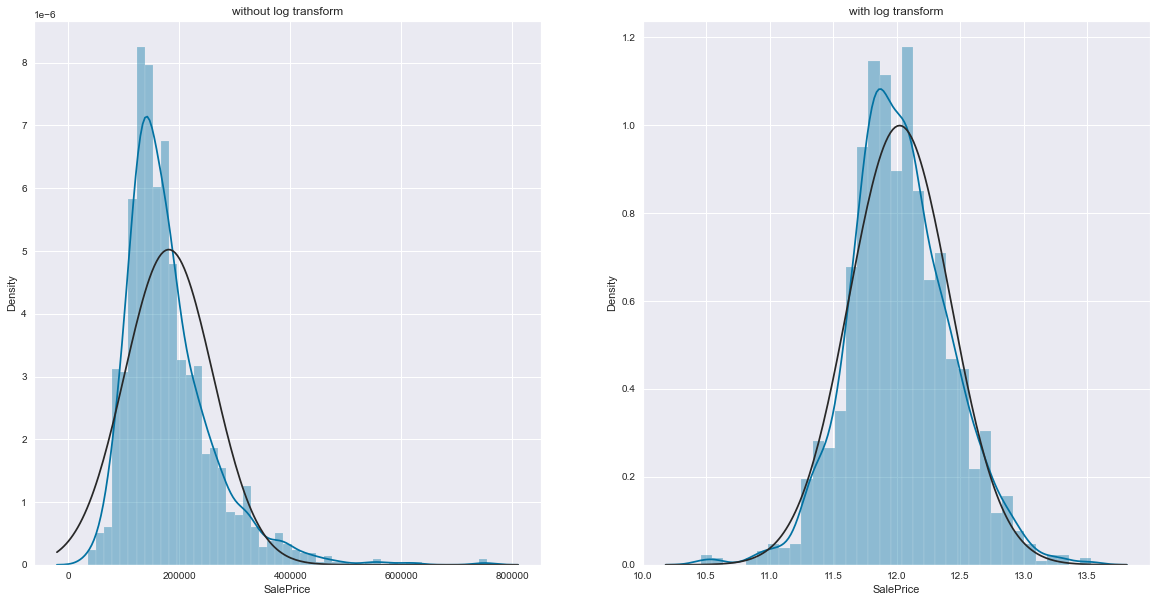

In [136]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)

sns.distplot(target,kde=True,fit=scipy.stats.norm)
plt.title("without log transform")

plt.subplot(1,2,2)
sns.distplot(np.log(target),kde=True,fit=scipy.stats.norm)
plt.title("with log transform")
plt.show()
data8=data7.copy()

In [137]:
log_target=np.log(target)


## split data

In [138]:
trainfinal=data8.loc[:train0.index.max(), :].copy()
testfinal=data8.loc[:train0.index.max()+1:,:].reset_index(drop=True).copy()

## model selection

In [139]:
setup(data=pd.concat([trainfinal,log_target],axis=1),target="SalePrice")

,Description,Value
0,session_id,5121
1,Target,SalePrice
2,Original Data,"(1460, 322)"
3,Missing Values,False
4,Numeric Features,316
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 330)"


(240     12.478006
 1267    12.843971
 517     12.487485
 1064    11.944708
 145     11.775290
           ...    
 359     12.542545
 1155    12.292251
 877     12.765689
 654     12.765689
 1114    11.669930
 Name: SalePrice, Length: 1021, dtype: float32,
 '594a',
 {'lr': <pycaret.containers.models.regression.LinearRegressionContainer at 0x28c89982f40>,
  'lasso': <pycaret.containers.models.regression.LassoRegressionContainer at 0x28c89982700>,
  'ridge': <pycaret.containers.models.regression.RidgeRegressionContainer at 0x28c89982790>,
  'en': <pycaret.containers.models.regression.ElasticNetContainer at 0x28c899821f0>,
  'lar': <pycaret.containers.models.regression.LarsContainer at 0x28c89982520>,
  'llar': <pycaret.containers.models.regression.LassoLarsContainer at 0x28c89982c40>,
  'omp': <pycaret.containers.models.regression.OrthogonalMatchingPursuitContainer at 0x28c899827f0>,
  'br': <pycaret.containers.models.regression.BayesianRidgeContainer at 0x28c89982a60>,
  'ard': <pycaret

In [140]:
compare_models()#this compare various results and we can see what is more effective

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0820,0.0159,0.1246,0.8981,0.0097,0.0069,2.4280
gbr,Gradient Boosting Regressor,0.0916,0.0180,0.1330,0.8842,0.0103,0.0077,0.1470
br,Bayesian Ridge,0.0911,0.0188,0.1349,0.8789,0.0104,0.0076,0.0550
lightgbm,Light Gradient Boosting Machine,0.0936,0.0191,0.1368,0.8774,0.0106,0.0078,0.1880
omp,Orthogonal Matching Pursuit,0.0942,0.0191,0.1363,0.8773,0.0105,0.0079,0.0080
rf,Random Forest Regressor,0.0971,0.0204,0.1419,0.8693,0.0110,0.0081,0.3650
ridge,Ridge Regression,0.0933,0.0212,0.1426,0.8629,0.0110,0.0078,0.0100
et,Extra Trees Regressor,0.1016,0.0226,0.1494,0.8556,0.0116,0.0085,0.4200
ada,AdaBoost Regressor,0.1330,0.0308,0.1750,0.8012,0.0135,0.0111,0.1530
huber,Huber Regressor,0.1495,0.0401,0.1964,0.7409,0.0151,0.0125,0.3570


## baseline model

In [141]:
baseline_model= CatBoostRegressor(verbose=0)



In [142]:
baseline_model.fit(trainfinal,log_target)


# Hyperparameter optimization


In [164]:
#br study
def br_objective(trial):#2,14 of house price regression for explanation
    n_iter=trial.suggest_int('n_iter',50,600)
    tol=trial.suggest_loguniform('tol', 1e-8,10)
    alpha_1=trial.suggest_loguniform('alpha_1', 1e-8,10)
    alpha_2=trial.suggest_loguniform('alpha_2', 1e-8,10)
    lambda_1=trial.suggest_loguniform('lambda_1', 1e-8,10)
    lambda_2=trial.suggest_loguniform('lambda_2', 1e-8,10)
    model=BayesianRidge(
    n_iter=n_iter,
    tol=tol,
    alpha_1=alpha_1,
    alpha_2=alpha_2,
    lambda_1=lambda_1,
    lambda_2=lambda_2,
    )
    model.fit(trainfinal, log_target)
    cv_score=np.exp(np.sqrt(-cross_val_score(model, trainfinal, log_target,scoring="neg_mean_squared_error",cv=kf)))
    return np.mean(cv_score)

In [165]:
study=optuna.create_study(direction='minimize')
study.optimize(br_objective,n_trials=100)

[I 2022-04-21 14:52:20,002] A new study created in memory with name: no-name-1243102a-851d-4706-891b-1c683d73b27f
[I 2022-04-21 14:52:22,478] Trial 0 finished with value: 1.1368630478381454 and parameters: {'n_iter': 469, 'tol': 0.004032274258306589, 'alpha_1': 3.7439651270616103, 'alpha_2': 0.024681059292417255, 'lambda_1': 1.837357181950453e-07, 'lambda_2': 2.5413287335707317e-06}. Best is trial 0 with value: 1.1368630478381454.
[I 2022-04-21 14:52:24,729] Trial 1 finished with value: 1.1368851882614164 and parameters: {'n_iter': 542, 'tol': 0.41621706927023483, 'alpha_1': 1.927541474046991, 'alpha_2': 0.03167196084947531, 'lambda_1': 1.83614282282807, 'lambda_2': 1.908841440025869e-05}. Best is trial 0 with value: 1.1368630478381454.
[I 2022-04-21 14:52:27,129] Trial 2 finished with value: 1.136920531934892 and parameters: {'n_iter': 147, 'tol': 0.0033203659469606683, 'alpha_1': 3.9899539594651715e-05, 'alpha_2': 4.1085019237216684, 'lambda_1': 0.0002319156718713119, 'lambda_2': 3.0

In [167]:
study.best_params

{'n_iter': 81,
 'tol': 8.448650076935523e-05,
 'alpha_1': 3.7885685077621635e-06,
 'alpha_2': 1.5453813498445836,
 'lambda_1': 3.769681241597666e-08,
 'lambda_2': 5.663743114216087e-06}

# Bagging Ensemble

In [169]:
# we apply the optuna optimizer for every hyperparameters and it said the following
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}

br_params = {
   'n_iter': 81,
   'tol': 8.448650076935523e-05,
   'alpha_1': 3.7885685077621635e-06,
   'alpha_2': 1.5453813498445836,
   'lambda_1': 3.769681241597666e-08,
   'lambda_2': 5.663743114216087e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}

In [170]:
models={
    "catboost":CatBoostRegressor(**catboost_params,verbose=0),
    "br":BayesianRidge(**br_params),
    "huber":HuberRegressor(),
    "ridge":Ridge(**ridge_params),
    "omp":OrthogonalMatchingPursuit()
}


In [171]:
for name, model in models.items():
    model.fit(trainfinal, log_target)
    print(name+"trained")

catboosttrained
brtrained
hubertrained
ridgetrained
omptrained


## evaluate

In [172]:
results={}
kf=KFold(n_splits=10)
for name, model in models.items():
    result=np.exp(np.sqrt(-cross_val_score(model, trainfinal, log_target,scoring="neg_mean_squared_error",cv=kf)))
    results[name]=result

In [173]:

for name,result in results.items():
    print("-----------\n"+ name +"\n-------")
    print(np.mean(result))
    print(np.std(result))

-----------
catboost
-------
1.1241940476338619
0.020770884004875357
-----------
br
-------
1.1366572434451185
0.02291903109521458
-----------
huber
-------
1.2545795115968872
0.03941497122646159
-----------
ridge
-------
1.1685032338164656
0.022014164918034755
-----------
omp
-------
1.1447469583778034
0.024004814254496232


# combine predictions

In [174]:
#improving with ensemble model 
#we need to go up in percentage the better models
final_predictions=(
    0.4*np.exp(models['catboost'].predict(testfinal))+
    0.2*np.exp(models['br'].predict(testfinal))+
    0.1*np.exp(models['huber'].predict(testfinal))+
    0.2*np.exp(models['ridge'].predict(testfinal))+
    0.1*np.exp(models['omp'].predict(testfinal))
    
)
final_predictions

array([204713.24131748, 184678.55528592, 220736.71836604, ...,
       138382.5380149 , 147933.13694187, 123816.28987816])

# make submission


In [175]:

submission=pd.concat([test_ids,pd.Series(final_predictions, name="SalePrice")],axis=1)
submission

,Id,SalePrice
0,1461.0,204713.241317
1,1462.0,184678.555286
2,1463.0,220736.718366
3,1464.0,174787.871901
4,1465.0,308826.989669
...,...,...
1456,2917.0,200248.854024
1457,2918.0,251553.878624
1458,2919.0,138382.538015
1459,NaN,147933.136942


In [152]:
submission.to_csv(r"C:\Users\usuario\Downloads\house-prices-advanced-regression-techniques\submission.csv", index=False, header=True)

In [ ]:
# first submission: 0.1254
#second submission:0.12361 we use combining predictions that improve de model
#third submission:0.12328 we use feature engineering and improve the model
# fourth submission:0.12176 ensemble model with custom weights(experimenting with this is good idea)
#fifth submission:0.12108 optuna optimization for every hyperparameters.